# Predicting key factors of USA health insurance cost

The dataset can be obtained from https://www.kaggle.com/mirichoi0218/insurance
    
To handle the data (a table in csv format), we will use the pandas library for Python. 
Useful tutorials can be found at https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html

In [52]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Introduction to `pandas`

### Importing the database

In [53]:
# Importing the csv data
data = pd.read_csv("./Data/insurance.csv")

Some information on the imported database can be printed using the commands `head()`, `describe()` and `info()`

In [54]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [55]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


As we can see, the table 1338 entries (rows) and 7 columns named
- age (int)
- sex (object)
- bmi (float): body mass index
- children (int)
- smoker (object)
- region (object): the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges (charges): Individual medical costs billed by health insurance

### Replacing text by numerical data

In [57]:
data = data.replace({'male': 1, 'female': 2, 'no': 0, 'yes': 1})  # for sex and smoker columns
data = data.replace({'southeast': 0, 'southwest': 1, 'northwest': 2, 'northeast': 3})

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


### Splitting the dataset between train and test data

We will split the dataset between the training dataset `train` and the testing dataset `test`.

The goal will be to find the best possible prediction of the medical cost given the other variables (age, sex...). To test how good the prediction is, we will use the testing set. 

In [58]:
train, test = train_test_split(data, test_size=0.2)

### Plotting the data

You can conveniently plot the data with one the following methods. 

<AxesSubplot: xlabel='age', ylabel='charges'>

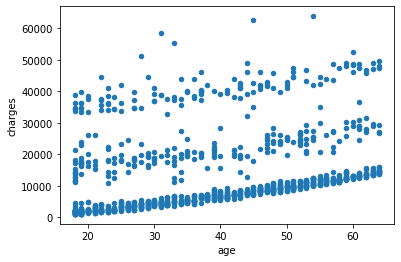

In [59]:
# plot applied to the pandas object
train.plot.scatter('age', 'charges')

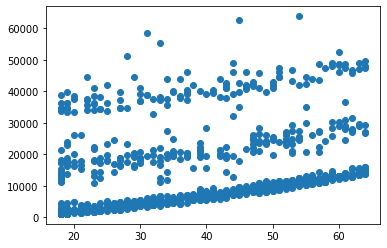

In [60]:
# plot after transforming data into numpy arrays
x = np.array(train["age"])
y = np.array(train["charges"])
plt.scatter(x, y)
plt.show()

Pair-wise correlations can be computed with the function `corr()`. 
Large positive or negative correlations with the column `charges` indicate that the variable is an important factor in determining the price of medical cost. 

In [61]:
train.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.045381,0.103565,0.048865,-0.021755,-0.003230,0.293913
sex,0.045381,1.000000,-0.047237,-0.015488,-0.066525,0.008890,-0.040839
bmi,0.103565,-0.047237,1.000000,0.004828,0.009238,-0.248236,0.209001
children,0.048865,-0.015488,0.004828,1.000000,0.008875,0.008933,0.068241
smoker,-0.021755,-0.066525,0.009238,0.008875,1.000000,-0.033161,0.791947
region,-0.003230,0.008890,-0.248236,0.008933,-0.033161,1.000000,-0.029633
charges,0.293913,-0.040839,0.209001,0.068241,0.791947,-0.029633,1.000000


From these values, we see that the three key factors are 
- age
- bmi
- smoker

## Linear regression with one variable

### Plotting

### Question 1
Plot how the medical cost varies as a function of other vaiables and see whether you can spot the correlations evidenced with the function `corr()`. 

In [62]:
# your answer here

### Gradient descent algorithm

We want to find a linear regression between x = age and y = charges.

The linear regression consists in the hypothesis

$$h_\theta (x) = \theta_0 + \theta_1 x$$

with the cost function

$$J(\theta_0, \theta_1) = \frac{1}{2N}
\sum_{i=1}^N \left( h_\theta (x^{(i)}) - y^{(i)} \right)^2$$

The iterative procedure of the gradient descent algorithm is then 

$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta)$$

with $\alpha$ the learning parameter and 

$$\frac{\partial J}{\partial \theta_0} = \frac{1}{N}
\sum_{i=1}^N \left( h_\theta (x^{(i)}) - y^{(i)} \right)$$

$$\frac{\partial J}{\partial \theta_1} = \frac{1}{N}
\sum_{i=1}^N \left( h_\theta (x^{(i)}) - y^{(i)} \right)x^{(i)}$$

### Question 2
- Complete the following code to implement a gradient descent algorithm
- Check if the learning converges for different values of $\alpha$ (a plot of J as a function of t may help)

t 0   J 79523748.06953378 theta0, theta1 1004.6395787416355 392.59084518292525
t 1   J 74501973.1587091 theta0, theta1 1001.7389961059982 252.10778114999468
t 2   J 71830368.55244821 theta0, theta1 1004.3380093415972 354.5625282300438
t 3   J 70409046.96474236 theta0, theta1 1002.9256661422285 279.82303188467085
t 4   J 69652871.91243316 theta0, theta1 1004.4390752430642 334.325666619848
t 5   J 69250552.67666364 theta0, theta1 1003.8184407424411 294.56153658700805
t 6   J 69036483.60057218 theta0, theta1 1004.7542820800148 323.55380313214954
t 7   J 68922563.00966763 theta0, theta1 1004.5548041826258 302.39645567167184
t 8   J 68861921.0977166 theta0, theta1 1005.1833514722748 317.81728942271843
t 9   J 68829623.27920593 theta0, theta1 1005.2078976671376 306.5586908606327
t 10   J 68812404.43518768 theta0, theta1 1005.6729356591702 314.75956688134863
t 11   J 68803207.56523061 theta0, theta1 1005.8166320940676 308.7670714327857
t 12   J 68798278.36789934 theta0, theta1 1006.1946538179

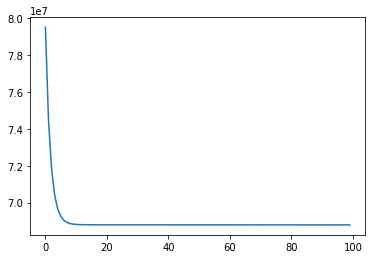

In [63]:
T = 100  # number of steps
alpha = 0.001  # learning parameter
theta0 = 1000.  # initial value
theta1 = 200.  # initial value
N = len(x)  
Jtable = []

#for t in range(T):
#    for i in range(N):
for t in range(T):
    J = 0
    dJ0 = 0
    dJ1 = 0
    for i in range(N):
        h_minus_y = theta0 + theta1 * x[i] - y[i]
        J += h_minus_y**2 / (2 * N)
        dJ0 += h_minus_y /N
        dJ1 += h_minus_y * x[i] /N
    theta0 -= alpha * dJ0
    theta1 -= alpha * dJ1
    Jtable.append(J)
    print('t', t, '  J', J,  'theta0, theta1', theta0, theta1)
plt.plot(Jtable)
plt.show()

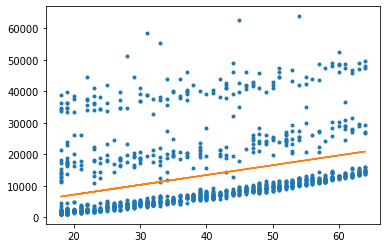

In [64]:
# check the linear regression works
plt.plot(x,y,'.')
plt.plot(x,theta0 + theta1 * x)
plt.show()

### Evaluation of the prediction

In [65]:
def EvaluationError(y, h):
    N = len(y)
    assert len(h)==N, 'The two vectors do not have the same length.'
    J = 0
    for i in range(N):
        h_minus_y = h[i] - y[i]
        J += h_minus_y**2 / (2 * N)
    return J

In [66]:
def PredictionError(y, h):
    return 0.5 * np.mean((np.array(y) - np.array(h))**2)

In [67]:
x_test = np.array(test["age"])
y_test = np.array(test["charges"])
h_test = theta0 + theta1 * x_test

print("Mean error J: %.3e" % EvaluationError(y_test, h_test))
print("Mean error J: %.3e" % PredictionError(y_test, h_test))

Mean error J: 5.987e+07
Mean error J: 5.987e+07


### Direct method
The parameters $\theta_0$ and $\theta_1$ can also be obtained by the direct method

$\theta_1 = {\langle (x - \langle x \rangle) (y - \langle y \rangle)} \,/\, {\langle(x - \langle x \rangle)^2\rangle}$

$\theta_0 = \langle y \rangle - \theta_1 \langle x \rangle$

### Question 4
Complete the code below to calculate $\theta_0$ and $\theta_1$ directly.

theta_0, theta_1 3449.664670391572 255.96923652202307


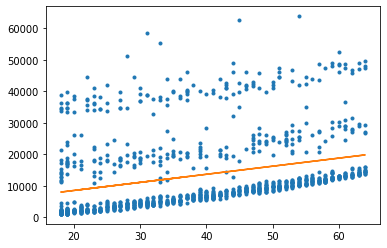

In [68]:
xm = np.mean(x)
ym = np.mean(y)

theta_1 = np.mean((x - xm) * (y - ym)) / np.mean((x - xm)**2)
theta_0 = ym - theta_1 * xm

print("theta_0, theta_1", theta_0, theta_1)

plt.plot(x, y, '.')
plt.plot(x, theta_0 + theta_1 * x)
plt.show()

## Multivariable linear regression

### Rescaled variables

In [69]:
# Input variables
x0 = np.array(train["age"])
x1 = np.array(train["bmi"])
x2 = np.array(train["smoker"])
y = np.array(train["charges"])

x0test = np.array(test["age"])
x1test = np.array(test["bmi"])
x2test = np.array(test["smoker"])
ytest = np.array(test["charges"])

In [70]:
def ToRescaled(x, mean=None, std=None):
    if mean is None:
        mean = np.mean(x)
    if std is None:
        std = np.std(x)
    x_ = (x - mean) / std
    return x_, mean, std
    
def FromRescaled(x_, mean, std):
    x = x_ * std + mean 
    return x

In [71]:
x_0, mean0, std0 = ToRescaled(x0)
x_1, mean1, std1 = ToRescaled(x1)
x_2, mean2, std2 = ToRescaled(x2)
y_ , meany, stdy = ToRescaled(y)

x_0test, _, _ = ToRescaled(x0test, mean0, std0)
x_1test, _, _ = ToRescaled(x1test, mean1, std1)
x_2test, _, _ = ToRescaled(x2test, mean2, std2)
y_test , _, _ = ToRescaled(ytest , meany, stdy)

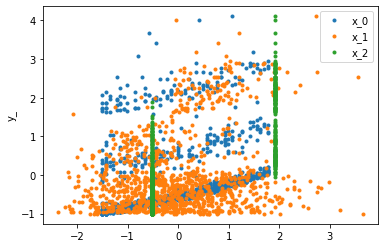

In [72]:
plt.plot(x_0, y_, '.', label="x_0")
plt.plot(x_1, y_, '.', label="x_1")
plt.plot(x_2, y_, '.', label="x_2")
plt.legend()
plt.ylabel('y_')
plt.show()

### Gradient descent

In [73]:
X_ = np.concatenate(
    (np.ones(shape=(len(y),1)), 
     x_0[:, np.newaxis],  
     x_1[:, np.newaxis], 
     x2[:, np.newaxis]), axis=1)

t 0   J 0.805071808022866 theta [0.07439681 0.51130086 0.89324942 0.07733181]
t 10   J 0.38559079568886445 theta [-0.0056573   0.33072286  0.42041121  0.35157048]
t 20   J 0.28933579596305004 theta [-0.06866878  0.28788185  0.26112906  0.58669601]
t 30   J 0.24120654419127743 theta [-0.12066972  0.28053624  0.20639302  0.78757935]
t 40   J 0.20862308019168396 theta [-0.16443413  0.28125208  0.18698699  0.95893539]
t 50   J 0.18523945815642912 theta [-0.20154982  0.28321473  0.17972323  1.10500076]
t 60   J 0.16829941463590584 theta [-0.23311802  0.28498909  0.17673163  1.22946904]
t 70   J 0.1560085169090516 theta [-0.2599965   0.28640826  0.17530006  1.33551885]
t 80   J 0.14708848493354001 theta [-0.2828907   0.28754001  0.17447598  1.4258702 ]
t 90   J 0.14061453092159296 theta [-0.30239378  0.2884612   0.17391575  1.50284485]
t 100   J 0.13591584268701895 theta [-0.31900879  0.28922522  0.17348995  1.56842248]
t 110   J 0.13250560702780503 theta [-0.33316356  0.28986676  0.17314608

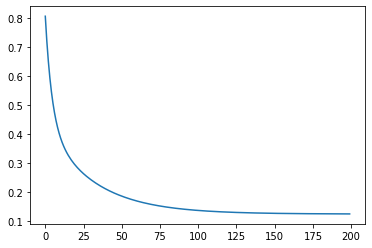

In [79]:
T = 200  # number of steps
alpha = 0.1  # learning parameter
N = X_.shape[0]  # number of data points (1070 here)
M = X_.shape[1]  # number of features/variables (4 here)
theta = np.random.rand(M)
Jtable = []

for t in range(T):
    h_minus_y = np.sum(theta[np.newaxis, :] * X_, axis=1) - y_
    J = np.sum(h_minus_y**2) / (2 * N)
    dJ = np.sum(h_minus_y[:, np.newaxis] * X_, axis=0) / N
    theta -= alpha * dJ
    Jtable.append(J)
    if t % 10==0:
        print('t', t, '  J', J,  'theta', theta)
plt.plot(Jtable)
plt.show()

In [80]:
dJ.shape

(4,)

<function matplotlib.pyplot.show(close=None, block=None)>

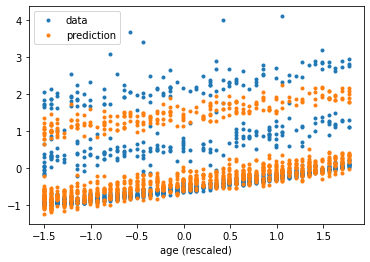

In [81]:
h_ = np.sum(theta[np.newaxis, :] * X_, axis=1)
plt.plot(x_0, y_, '.', label='data')
plt.plot(x_0, h_, '.', label='prediction')
plt.xlabel('age (rescaled)')
plt.legend()
plt.show

In [82]:
X_test = np.concatenate(
    (np.ones(shape=(len(ytest),1)), 
     x_0test[:, np.newaxis], 
     x_1test[:, np.newaxis], 
     x2test[:, np.newaxis]), axis=1)

h_test = np.sum(theta[np.newaxis, :] * X_test, axis=1)
htest = FromRescaled(h_test, meany, stdy)

print("Mean error J: %.3e" % EvaluationError(ytest, htest))

Mean error J: 1.861e+07


### Direct method

In [31]:
XTXinv = np.linalg.inv(np.transpose(X_).dot(X_))

In [35]:
thetadirect = XTXinv.dot(np.transpose(X_).dot(y_))
print(thetadirect)
print(theta)

[-0.40370232  0.30207063  0.15863494  1.95457683]
[-0.38729433  0.30181738  0.15912205  1.88752428]


In [36]:
h_test = np.sum(thetadirect[np.newaxis, :] * X_test, axis=1)
htest = FromRescaled(h_test, meany, stdy)

print("Mean error J: %.3e" % EvaluationError(ytest, htest))

Mean error J: 1.836e+07
